In [42]:
import pandas as pd


df = pd.read_csv("creditcard.csv")

In [43]:
# loading the dataset to a Pandas DataFrame
credit_card_data = pd.read_csv('creditcard.csv')

In [44]:
print("Rows, Columns:", df.shape)

Rows, Columns: (284807, 31)


In [45]:
print("Columns:")
print(df.dtypes)


Columns:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [46]:
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True) * 100)

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    99.827251
1     0.172749
Name: proportion, dtype: float64


In [47]:
print(df.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

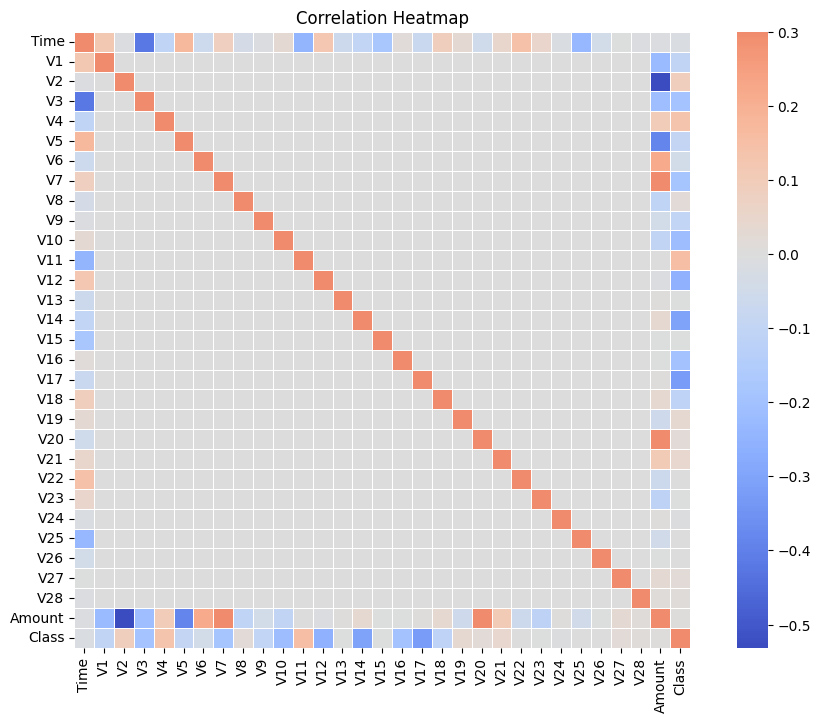

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', vmax=0.3, center=0, square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [49]:
# checking the number of missing values in each column
credit_card_data.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [50]:
# distribution of legit transactions & fraudulent transactions
credit_card_data['Class'].value_counts()

,count
Class,
0,284315
1,492


In [51]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [52]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [53]:
# statistical measures of the data
legit.Amount.describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [54]:
# compare the values for both transactions
credit_card_data.groupby('Class').mean()
legit_sample = legit.sample(n=492)

In [55]:
new_dataset = pd.concat([legit_sample, fraud], axis=0)
new_dataset.head()
new_dataset.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1
281674,170348.0,1.991976,0.158476,-2.583441,0.408670,1.151147,-0.096695,0.223050,-0.068384,0.577829,...,-0.164350,-0.295135,-0.072173,-0.450261,0.313267,-0.289617,0.002988,-0.015309,42.53,1


In [56]:
new_dataset['Class'].value_counts()

,count
Class,
0,492
1,492


In [57]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,97128.032520,0.086644,0.000308,-0.078814,0.011772,0.050994,0.118335,-0.065419,-0.053955,0.068183,...,0.051703,-0.025873,0.022142,0.007685,-0.010621,-0.014955,-0.024119,-0.012220,-0.005095,88.526423
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [58]:
X = new_dataset.drop(columns='Class', axis=1)
Y = new_dataset['Class']

In [59]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
205315  135684.0  2.046981 -0.144881 -2.300075  0.030539  0.817137 -0.613830   
58404    48370.0 -0.304687  1.199195  1.032339  2.896045  0.172535 -0.286473   
128183   78629.0  1.242138 -1.396755  0.208173 -1.274985 -1.482141 -0.571409   
215732  140195.0  2.178249 -0.804678 -1.561197 -1.248218 -0.018784 -0.139131   
137649   82262.0  0.710085 -0.684966  1.158796  1.780275 -0.862899  0.879076   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [60]:
print(Y)

205315    0
58404     0
128183    0
215732    0
137649    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [63]:
# Create a pipeline that scales the data and applies Logistic Regression
model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))

# Fit the model
model.fit(X_train, Y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [64]:
# accuracy on training data
from sklearn.metrics import accuracy_score
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.9542566709021602


In [65]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [66]:
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.934010152284264
